# Fun With Basketball Stats
I found the fantastic http://www.dougstats.com/ which has stats for basketball players dating back quite a ways. Doug has not only collected these stats, he's made them available in really well-structured text files that can be easily parsed by Pandas. All stats in this repository come from http://www.dougstats.com/ and are only copied into this repository to make it so I don't have to pull them down every time I run this notebook.

First load the initial data...

In [6]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

years_player_data = {}

# Load years into 
for filename in glob.glob('./player-data/*.txt'):
    year = filename.rsplit('/',1)[1].rsplit('.',1)[0]
    years_player_data[year] = pandas.read_csv(filename, delim_whitespace=True)
    # Add per-game measurements
    years_player_data[year]['ppg'] = (years_player_data[year]['PTS']/years_player_data[year]['GP']).round(1)
    years_player_data[year]['mpg'] = (years_player_data[year]['Min']/years_player_data[year]['GP']).round(1)
    years_player_data[year]['bpg'] = (years_player_data[year]['BK']/years_player_data[year]['GP']).round(1)
    years_player_data[year]['apg'] = (years_player_data[year]['AS']/years_player_data[year]['GP']).round(1)
    years_player_data[year]['spg'] = (years_player_data[year]['ST']/years_player_data[year]['GP']).round(1)
    years_player_data[year]['rpg'] = (years_player_data[year]['TR']/years_player_data[year]['GP']).round(1)
    years_player_data[year]['orpg'] = (years_player_data[year]['OR']/years_player_data[year]['GP']).round(1)
    years_player_data[year]['fgPct'] = (years_player_data[year]['FGM']/years_player_data[year]['FGA']).round(2)
    years_player_data[year]['ftPct'] = (years_player_data[year]['FTM']/years_player_data[year]['FTA']).round(2)
    years_player_data[year]['threePtPct'] = (years_player_data[year]['3M']/years_player_data[year]['3A']).round(2)

What are the top 10 players in points per-game for the 1997-1998 season?

In [7]:
players_16_17 = years_player_data['97-98']
players_16_17.sort_values(by=['ppg'], ascending=False).head(10)

,Player,Team,PS,GP,Min,FGM,FGA,3M,3A,FTM,...,ppg,mpg,bpg,apg,spg,rpg,orpg,fgPct,ftPct,threePtPct
201,"jordan,michael",chi,SG,82,3181,881,1893,30,126,565,...,28.7,38.8,0.5,3.5,1.7,5.8,1.6,0.47,0.78,0.24
282,"o'neal,shaquille",lal,C,60,2175,670,1147,0,1,359,...,28.3,36.2,2.4,2.4,0.6,11.4,3.5,0.58,0.53,0.00
234,"malone,karl",uta,PF,81,3030,780,1472,2,6,628,...,27.0,37.4,0.9,3.9,1.2,10.3,2.3,0.53,0.76,0.33
330,"robinson,glenn",mil,SF,56,2294,533,1135,25,65,215,...,23.3,41.0,0.6,2.8,1.2,5.5,1.4,0.47,0.81,0.38
323,"richmond,mitch",sac,SG,70,2575,543,1220,130,334,407,...,23.2,36.8,0.2,4.0,1.3,3.3,0.7,0.45,0.86,0.39
395,"walker,antoine",bos,PF,82,3268,722,1695,91,292,305,...,22.4,39.9,0.7,3.3,1.7,10.2,3.3,0.43,0.64,0.31
321,"rice,glen",cha,SF,82,3295,634,1386,130,300,428,...,22.3,40.2,0.3,2.2,0.9,4.3,1.1,0.46,0.85,0.43
2,"abdur-rahim,shar",van,SF,82,2955,653,1347,21,51,502,...,22.3,36.0,0.9,2.6,1.1,7.1,2.8,0.48,0.78,0.41
185,"iverson,allen",phi,PG,80,3150,649,1407,70,235,390,...,22.0,39.4,0.3,6.2,2.2,3.7,1.1,0.46,0.73,0.30
405,"webber,chris",was,PF,71,2809,647,1341,65,205,196,...,21.9,39.6,1.7,3.8,1.6,9.5,2.5,0.48,0.59,0.32


What are the top 3 point shooters in the league during the 1997-1998 season?

In [8]:
df = years_player_data['97-98']
df[df['3A'] > 20].sort_values(by=['threePtPct'], ascending=False).head(10)

,Player,Team,PS,GP,Min,FGM,FGA,3M,3A,FTM,...,ppg,mpg,bpg,apg,spg,rpg,orpg,fgPct,ftPct,threePtPct
116,"ellis,dale",sea,SF,79,1939,347,700,127,276,111,...,11.8,24.5,0.1,1.1,0.8,2.3,0.6,0.50,0.78,0.46
176,"hornacek,jeff",uta,SG,80,2460,399,828,56,127,285,...,14.2,30.8,0.2,4.4,1.4,3.4,0.8,0.48,0.89,0.44
190,"james,henry",cle,SF,28,166,24,59,11,25,21,...,2.9,5.9,0.0,0.2,0.0,0.5,0.1,0.41,0.95,0.44
206,"kerr,steve",chi,PG,50,1119,137,302,57,130,45,...,7.5,22.4,0.1,1.9,0.5,1.5,0.3,0.45,0.92,0.44
101,"delnegro,vinny",san,SG,54,1721,211,479,17,39,74,...,9.5,31.9,0.1,3.4,0.7,2.8,0.2,0.44,0.80,0.44
94,"davis,hubert",dal,SG,81,2371,350,767,101,230,97,...,11.1,29.3,0.1,1.9,0.5,2.1,0.4,0.46,0.84,0.44
255,"mcmillan,nate",sea,SG,18,279,23,67,15,34,1,...,3.4,15.5,0.2,3.1,0.8,2.2,0.7,0.34,1.00,0.44
269,"mullin,chris",ind,SF,82,2177,333,692,107,243,154,...,11.3,26.5,0.5,2.3,1.2,3.0,0.5,0.48,0.94,0.44
301,"person,wesley",cle,SG,82,3198,440,957,192,447,132,...,14.7,39.0,0.6,2.3,1.6,4.4,0.8,0.46,0.78,0.43
371,"stockton,john",uta,PG,64,1858,270,511,39,91,191,...,12.0,29.0,0.2,8.5,1.4,2.6,0.5,0.53,0.83,0.43


What is the distribution of players for the points per-game statistic in the 97-98 season?

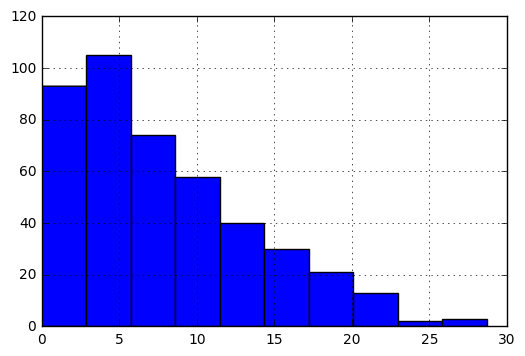

In [9]:
%matplotlib inline
years_player_data['97-98']['ppg'].hist()

What is the mean PPG of players by year? It looks like that was highest in 20009 with a mean of about 8.6 PPG.

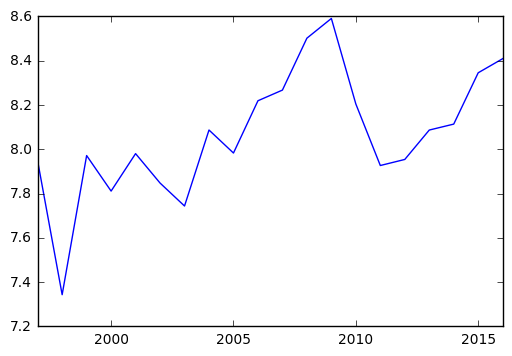

In [10]:
means = {}
for year in years_player_data:
    start_year = int(year.rsplit("-", 1)[0])
    if start_year > 17: # Must be a better way to do this, but this works for the current dataset
        start_year = start_year + 1900
    else:
        start_year = start_year + 2000
    means[start_year] = years_player_data[year]['ppg'].mean()
pandas.Series(means).plot()

What is the percentile rank of John Stockton in Assists and Points during the 97-98 season?

In [33]:
df = years_player_data['97-98']
john_stockton = df[df['Player'] == 'stockton,john'].squeeze()

def cumDistFunc(index, data_frame, row_to_check):
    count = 0
    for _, row in data_frame.iterrows():
        if row[index] <= row_to_check[index]:
            count += 1
    prob = count / len(data_frame.index)
    return prob

cumDistFunc('apg', df, john_stockton)


0.9908883826879271

What is the cumulative distribution function for APG for players during the 97-98 season?

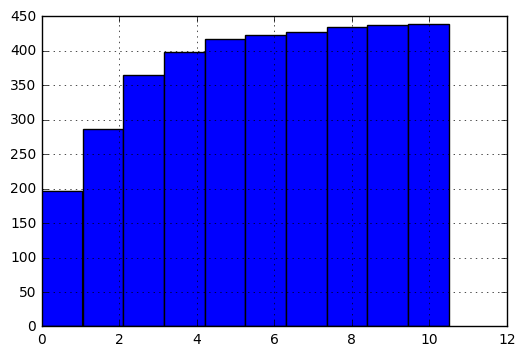

In [37]:
df['apg'].hist(cumulative=True)